In [0]:
# importing libraries

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from os import listdir
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
import seaborn as sns
import cv2
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import PIL
from skimage import color
from skimage import io
from sklearn.metrics import confusion_matrix

import pandas as pd
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.layers import Activation, Convolution2D, Dropout, Conv2D
from keras.layers import AveragePooling2D, BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Flatten
from keras.models import Model
from keras.layers import Input
from keras.layers import MaxPooling2D
from keras.layers import SeparableConv2D
from keras import layers
from keras.regularizers import l2

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [0]:
link = 'https://drive.google.com/open?id=171z4aMzRxOyVNpvtGBkiSOfsDqJLSZJF'

In [0]:
fluff, id = link.split('=')
print (id)

171z4aMzRxOyVNpvtGBkiSOfsDqJLSZJF


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
df = pd.read_csv('Filename.csv')

In [0]:
# file_path = 'face_data_up_final.csv'
# df = pd.read_csv(file_path)

In [0]:
df.head()

,emotion,pixels
0,3,168 155 176 198 177 160 169 178 174 181 161 15...
1,4,251 251 251 250 250 251 252 252 250 251 245 23...
2,5,254 255 243 200 160 132 95 74 137 189 204 203 ...
3,3,9 9 8 19 16 10 12 15 52 101 113 125 136 148 15...
4,4,23 15 23 27 26 25 26 24 20 20 19 30 45 42 43 3...


In [0]:
df_train, df_test = train_test_split(df, stratify = df['emotion'], test_size = 0.10)
df_train, df_cv = train_test_split(df_train, stratify = df_train['emotion'], test_size = 0.10)
print('Number of observations in training data: ', len(df_train))
print('Number of observations in cross validation data: ', len(df_cv))
print('Number of observations in test data: ', len(df_test))

Number of observations in training data:  30801
Number of observations in cross validation data:  3423
Number of observations in test data:  3803


In [0]:
df_train = df_train.reset_index(drop=True)
df_cv = df_cv.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [0]:
# function to plot graphs
# https://seaborn.pydata.org/generated/seaborn.countplot.html

def plot_bar_graph(df, title):
    fig = plt.figure(figsize = (10, 6))
    ax = fig.add_axes([0,0,1,1])
    ax.set_title(title, fontsize = 15)
    sns.countplot(x = "emotion", data = df)
    for i in ax.patches:
        ax.text(x = i.get_x() + 0.2, y = i.get_height()+1.5, s = str(i.get_height()), fontsize = 20, color = "grey")
    plt.xlabel("")
    plt.ylabel("Count", fontsize = 10)
    plt.tick_params(labelsize = 10)
    plt.xticks(rotation = 40)
    plt.show()

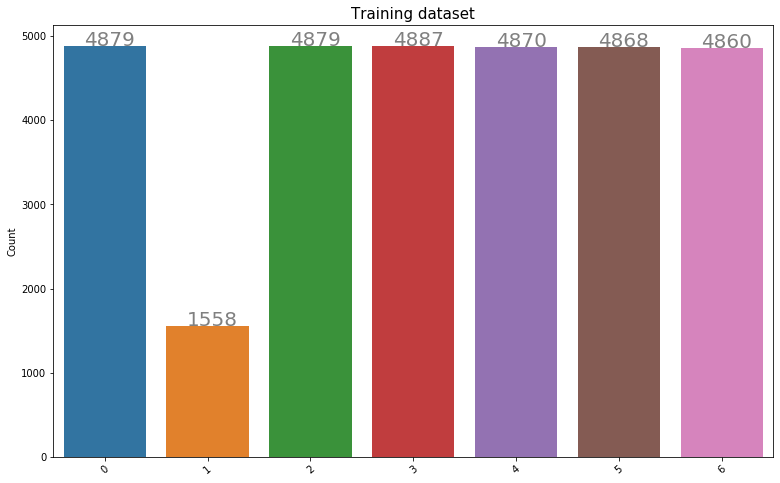

Percentage of images to 3: 15.8404% (4879)
Percentage of images to 2: 5.0583% (1558)
Percentage of images to 0: 15.8404% (4879)
Percentage of images to 4: 15.8664% (4887)
Percentage of images to 5: 15.8112% (4870)
Percentage of images to 6: 15.8047% (4868)
Percentage of images to 1: 15.7787% (4860)


In [0]:
# plotting graph of training dataset
plot_bar_graph(df_train, 'Training dataset')
x = df_train['emotion'].value_counts()
for i in range(len(x.index)):
    print(f'Percentage of images to {x.index[i]}: {np.round((x[i]/len(df_train))*100, 4)}% ({x[i]})')

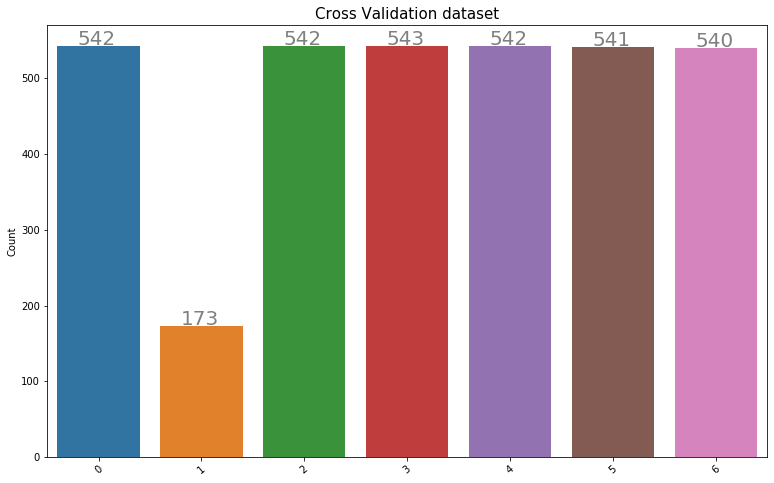

Percentage of images to 3: 15.8341% (542)
Percentage of images to 4: 5.054% (173)
Percentage of images to 2: 15.8341% (542)
Percentage of images to 0: 15.8633% (543)
Percentage of images to 5: 15.8341% (542)
Percentage of images to 6: 15.8048% (541)
Percentage of images to 1: 15.7756% (540)


In [0]:
# plotting graph of training dataset
plot_bar_graph(df_cv, 'Cross Validation dataset')
x = df_cv['emotion'].value_counts()
for i in range(len(x.index)):
    print(f'Percentage of images to {x.index[i]}: {np.round((x[i]/len(df_cv))*100, 4)}% ({x[i]})')

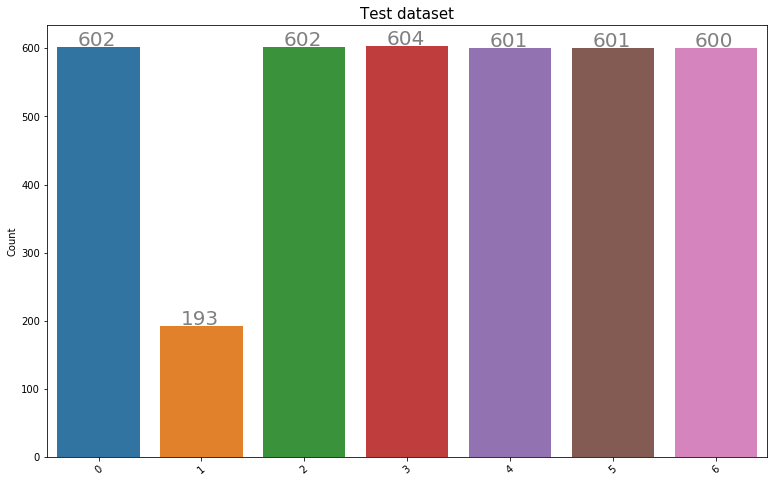

Percentage of images to 3: 15.8296% (602)
Percentage of images to 2: 5.0749% (193)
Percentage of images to 0: 15.8296% (602)
Percentage of images to 5: 15.8822% (604)
Percentage of images to 4: 15.8033% (601)
Percentage of images to 6: 15.8033% (601)
Percentage of images to 1: 15.777% (600)


In [0]:
# plotting graph of training dataset
plot_bar_graph(df_test, 'Test dataset')
x = df_test['emotion'].value_counts()
for i in range(len(x.index)):
    print(f'Percentage of images to {x.index[i]}: {np.round((x[i]/len(df_test))*100, 4)}% ({x[i]})')

In [0]:
# function to normalize the pixels of images

def preprocess(faces):
    faces = faces.astype('float32')
    faces = faces / 255.0
    faces = (faces - 0.5) * 2
    return faces

In [0]:
# function to reshape image pixels and return matrix
def return_matrix(data): 
    pixels = data['pixels'].tolist()
    width = 48
    height = 48
    faces = []
    for px in pixels:
        face = [int(pixel) for pixel in px.split()]
        face = np.asarray(face).reshape(width, height)
        faces.append(cv2.resize(face, (width, height)).astype('float32'))
    faces = np.asarray(faces)
    faces = np.expand_dims(faces, -1)
    emotions = pd.get_dummies(data['emotion']).as_matrix()
    return faces, emotions

In [0]:
# faces = preprocess(faces)
# x_train, x_test, y_train, y_test = train_test_split(faces, emotions, test_size=0.2, shuffle=True)

In [0]:
faces_train, emotions_train = return_matrix(df_train)
faces_test, emotions_test = return_matrix(df_test)
faces_cv, emotions_cv = return_matrix(df_cv)

In [0]:
faces_train = preprocess(faces_train)
faces_test = preprocess(faces_test)
faces_cv = preprocess(faces_cv)

__Training Phase__

In [0]:
batch_size = 32
num_epochs = 110
input_shape = (48, 48, 1)
verbose = 1
num_classes = 7
patience = 50
base_path = 'models/'
l2_regularization=0.01

In [0]:
data_generator = ImageDataGenerator(
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True)

In [0]:
regularization = l2(l2_regularization)

In [0]:
# building model
img_input = Input(input_shape)
x = Conv2D(8, (3, 3), strides=(1, 1), kernel_regularizer=regularization, use_bias=False)(img_input)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(8, (3, 3), strides=(1, 1), kernel_regularizer=regularization, use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
 
# module 1
residual = Conv2D(16, (1, 1), strides=(2, 2), padding='same', use_bias=False)(x)
residual = BatchNormalization()(residual)
x = SeparableConv2D(16, (3, 3), padding='same', kernel_regularizer=regularization, use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(16, (3, 3), padding='same', kernel_regularizer=regularization, use_bias=False)(x)
x = BatchNormalization()(x)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = layers.add([x, residual])
 
# module 2
residual = Conv2D(32, (1, 1), strides=(2, 2), padding='same', use_bias=False)(x)
residual = BatchNormalization()(residual)
x = SeparableConv2D(32, (3, 3), padding='same', kernel_regularizer=regularization, use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(32, (3, 3), padding='same', kernel_regularizer=regularization, use_bias=False)(x)
x = BatchNormalization()(x)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = layers.add([x, residual])
 
# module 3
residual = Conv2D(64, (1, 1), strides=(2, 2),padding='same', use_bias=False)(x)
residual = BatchNormalization()(residual)
x = SeparableConv2D(64, (3, 3), padding='same',kernel_regularizer=regularization,use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(64, (3, 3), padding='same',kernel_regularizer=regularization,use_bias=False)(x)
x = BatchNormalization()(x)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = layers.add([x, residual])
 
# module 4
residual = Conv2D(128, (1, 1), strides=(2, 2),padding='same', use_bias=False)(x)
residual = BatchNormalization()(residual)
x = SeparableConv2D(128, (3, 3), padding='same',kernel_regularizer=regularization,use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(128, (3, 3), padding='same',kernel_regularizer=regularization,use_bias=False)(x)
x = BatchNormalization()(x)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = layers.add([x, residual])
x = Conv2D(num_classes, (3, 3), padding='same')(x)
x = GlobalAveragePooling2D()(x)
output = Activation('softmax',name='predictions')(x)

In [0]:
model = Model(img_input, output)
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 48, 48, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 46, 46, 8)    72          input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 46, 46, 8)    32          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 46, 46, 8)    0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [0]:
cnnhistory = model.fit_generator(data_generator.flow(faces_train, emotions_train, batch_size),
                        steps_per_epoch=len(faces_train) / batch_size,
                        epochs=65, verbose=1,
                        validation_data=(faces_cv, emotions_cv))

Epoch 1/65
963/962 [==============================] - 290s 301ms/step - loss: 1.8447 - acc: 0.3017 - val_loss: 2.0391 - val_acc: 0.3199
Epoch 2/65
963/962 [==============================] - 286s 297ms/step - loss: 1.5722 - acc: 0.4086 - val_loss: 1.6395 - val_acc: 0.4084
Epoch 3/65
963/962 [==============================] - 286s 297ms/step - loss: 1.4587 - acc: 0.4496 - val_loss: 1.4899 - val_acc: 0.4370
Epoch 4/65
963/962 [==============================] - 287s 298ms/step - loss: 1.3906 - acc: 0.4736 - val_loss: 1.4667 - val_acc: 0.4557
Epoch 5/65
963/962 [==============================] - 290s 301ms/step - loss: 1.3433 - acc: 0.4940 - val_loss: 1.5314 - val_acc: 0.4259
Epoch 6/65
963/962 [==============================] - 316s 329ms/step - loss: 1.3084 - acc: 0.5096 - val_loss: 1.4150 - val_acc: 0.4844
Epoch 7/65
963/962 [==============================] - 318s 330ms/step - loss: 1.2845 - acc: 0.5150 - val_loss: 1.4335 - val_acc: 0.4660
Epoch 8/65
963/962 [============================

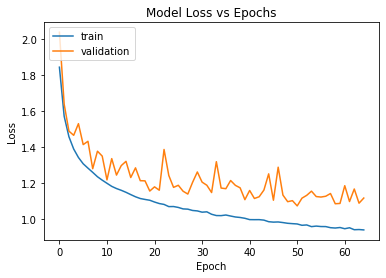

In [0]:
#plotting the graph of training and cross-validation loss

plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('Model Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

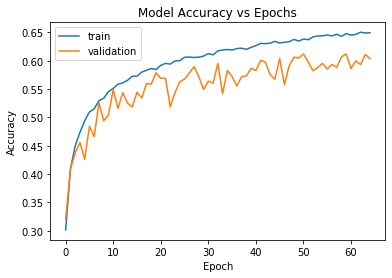

In [0]:
#plotting the graph of training and cross-validation loss

plt.plot(cnnhistory.history['acc'])
plt.plot(cnnhistory.history['val_acc'])
plt.title('Model Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
score = model.evaluate(faces_test, emotions_test, verbose=0)
print("Accuracy on test data: %.2f%%" % (score[1]*100))

Accuracy on test data: 60.37%


In [0]:
def convert_labels(y_prob):
    y = [np.argmax(i) for i in y_prob]
    y = np.array(y, dtype = np.int32)
    return y

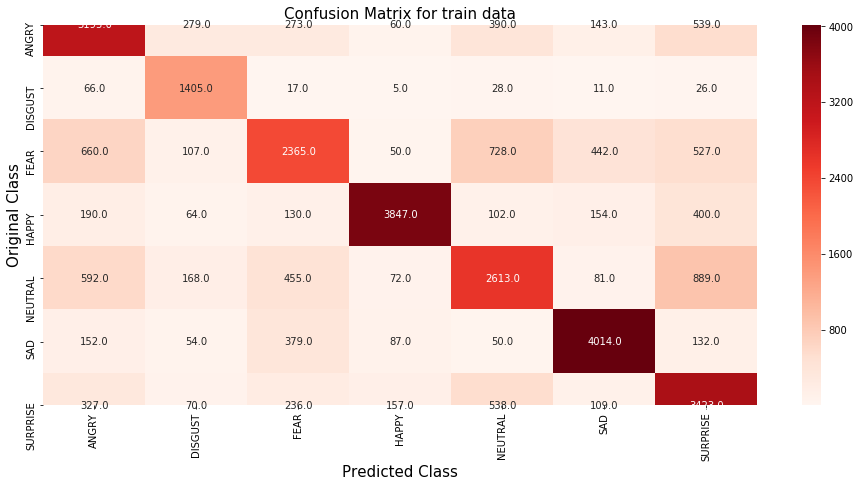

In [0]:
# plotting confusion matrix for train data
# https://www.kaggle.com/diegosch/classifier-evaluation-using-confusion-matrix

faces_train_pred = model.predict(faces_train)

cm = confusion_matrix(convert_labels(emotions_train), convert_labels(faces_train_pred))
labels = ["ANGRY", "DISGUST", "FEAR", "HAPPY", "NEUTRAL", "SAD", "SURPRISE"]
cm_df = pd.DataFrame(cm, index = labels, columns = labels)

# plt.figure(figsize=(16, 8))
plt.figure(figsize=(16,7))
sns.heatmap(cm, cmap = plt.get_cmap('Reds'), annot = True, fmt = ".1f", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for train data", fontsize = 15)
plt.xlabel('Predicted Class', fontsize = 15)
plt.ylabel('Original Class', fontsize = 15)
plt.tick_params(labelsize = 10)
plt.xticks(rotation = 90)
plt.show()

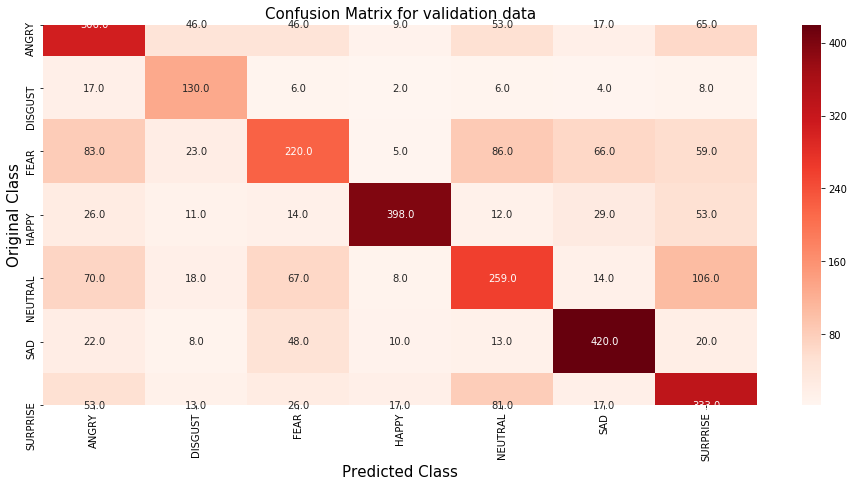

In [0]:
# plotting confusion matrix for validation data
# https://www.kaggle.com/diegosch/classifier-evaluation-using-confusion-matrix

faces_cv_pred = model.predict(faces_cv)

cm = confusion_matrix(convert_labels(emotions_cv), convert_labels(faces_cv_pred))
labels = ["ANGRY", "DISGUST", "FEAR", "HAPPY", "NEUTRAL", "SAD", "SURPRISE"]
cm_df = pd.DataFrame(cm, index = labels, columns = labels)

# plt.figure(figsize=(16, 8))
plt.figure(figsize=(16,7))
sns.heatmap(cm, cmap = plt.get_cmap('Reds'), annot = True, fmt = ".1f", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for validation data", fontsize = 15)
plt.xlabel('Predicted Class', fontsize = 15)
plt.ylabel('Original Class', fontsize = 15)
plt.tick_params(labelsize = 10)
plt.xticks(rotation = 90)
plt.show()

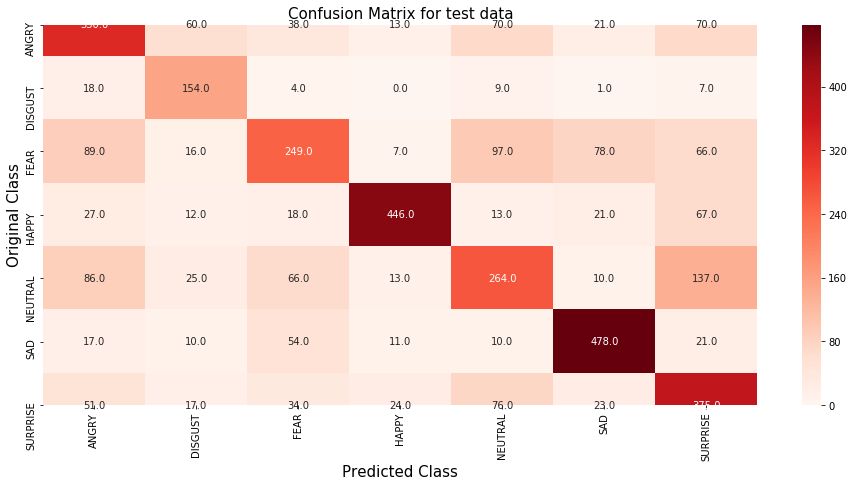

In [0]:
# plotting confusion matrix for test data
# https://www.kaggle.com/diegosch/classifier-evaluation-using-confusion-matrix

faces_test_pred = model.predict(faces_test)

cm = confusion_matrix(convert_labels(emotions_test), convert_labels(faces_test_pred))
labels = ["ANGRY", "DISGUST", "FEAR", "HAPPY", "NEUTRAL", "SAD", "SURPRISE"]
cm_df = pd.DataFrame(cm, index = labels, columns = labels)

# plt.figure(figsize=(16, 8))
plt.figure(figsize=(16,7))
sns.heatmap(cm, cmap = plt.get_cmap('Reds'), annot = True, fmt = ".1f", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for test data", fontsize = 15)
plt.xlabel('Predicted Class', fontsize = 15)
plt.ylabel('Original Class', fontsize = 15)
plt.tick_params(labelsize = 10)
plt.xticks(rotation = 90)
plt.show()

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 132681 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.13-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.13-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.13-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [0]:
model_json = model.to_json()
with open("drive/My Drive/model_faces_6k_1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("drive/My Drive/model_faces_6k_1_weights.h5")
print("Saved model to drive")

Saved model to drive
